In [1]:
# Dependencies
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import data frame for combusion engine cars
ev_df=pd.read_csv("Resources/Edmunds_ev.csv")
ev_df

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1763,1825,1889,1955,2023,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
1,Maintenance,185,772,413,3544,1690,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
2,Repairs,0,0,0,801,1223,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
3,Taxes_Fees,5574,398,356,323,323,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
4,Financing,6998,5703,4279,2714,994,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
...,...,...,...,...,...,...,...,...,...,...
338,Repairs,0,0,0,357,545,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993
339,Taxes_Fees,2525,180,161,146,146,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993
340,Financing,3163,2578,1934,1227,450,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993
341,Depreciation,14139,1969,1865,2187,2072,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993


In [3]:
ev_df=ev_df.set_index(["info"])

In [4]:
#ev_value_fraction.sort_values(["year 1"],ascending=False)

Text(0, 0.5, 'Percentage of Deperation')

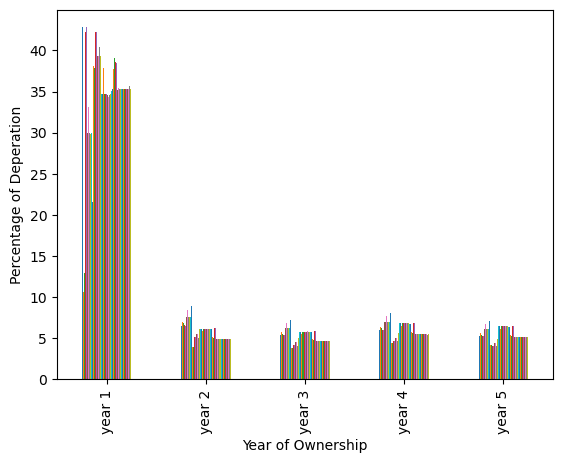

In [5]:
#ice_value_fraction=ice_df.loc[["Depreciation"],['year 1', 'year 2', 'year 3', 'year 4', 'year 5',"cost"]]
ev_value_fraction=ev_df.loc[["Depreciation"],['model','cost']]#pd.DataFrame(columns=['year 1'])
for i in range(5):
    text='year '+str(i+1)
    ev_value_fraction[text] = ev_df.loc[["Depreciation"],[text]]
    ev_value_fraction[text] = ev_value_fraction[text]/ev_value_fraction["cost"]*100
ev_value_fraction=ev_value_fraction.T
#make models in row 1 header
ev_value_fraction.columns=ev_value_fraction.iloc[0]
#remove row 1
ev_value_fraction=ev_value_fraction.drop(["model",'cost'])
ev_value_fraction_plot = ev_value_fraction.plot(kind='bar',legend=False,align="center")
ev_value_fraction_plot.set_xlabel("Year of Ownership")
ev_value_fraction_plot.set_ylabel("Percentage of Deperation")

In [6]:
#add up yearly cost based on model and engine type
ev_yearly_cost_df=ev_df.groupby(["model","engine",'cost']).sum()
#fix summing of model year
ev_yearly_cost_df["model year"]=round(ev_yearly_cost_df["model year"]/7,0).astype(int)
ev_yearly_cost_df.head()

,,,year 1,year 2,year 3,year 4,year 5,model year
model,engine,cost,,,,,,
Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473,53584,15723,12941,15950,12236,2023
Audi e-tron GT Premium Plus 4dr Sedan AWD,electric 2A,88666,26290,16832,13273,17753,12737,2023
Audi e-tron GT Prestige 4dr Sedan AWD,electric 2A,98487,31068,18007,14192,18547,13282,2023
Audi e-tron Premium 4dr SUV AWD,electric DD,76191,46165,14126,11684,14842,11452,2023
Audi e-tron Premium Plus 4dr SUV AWD,electric DD,82980,50458,14984,12358,15432,11866,2023


Text(0, 0.5, '5 Year Cost ($)')

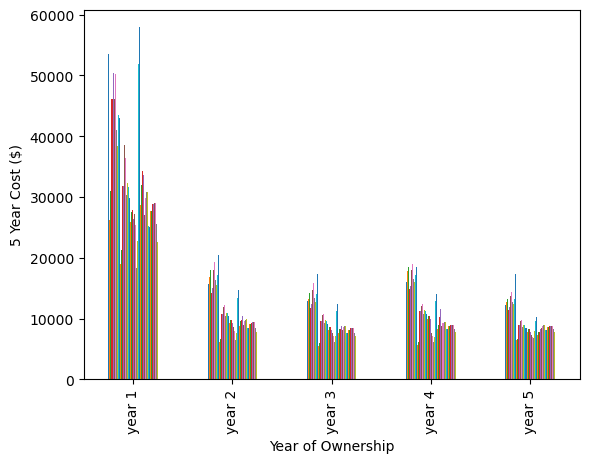

In [7]:
#fig,ax =plt.subplots()
#ax.bar(ice_yearly_cost_df[])
ev_transposed = ev_yearly_cost_df[['year 1', 'year 2', 'year 3', 'year 4', 'year 5']].T
ev_transposed_plot = ev_transposed.plot(kind='bar',legend=False,align="center")#, figsize=(6,8))
ev_transposed_plot.set_xlabel("Year of Ownership")
ev_transposed_plot.set_ylabel("5 Year Cost ($)")

In [8]:
ev_yearly_cost_df['five_year_cost']=0
for i in range(5):
    text='year '+str(i+1)
    ev_yearly_cost_df['five_year_cost']=ev_yearly_cost_df['five_year_cost']+ev_yearly_cost_df[text]
    

In [9]:
ev_yearly_cost_df.head()

,,,year 1,year 2,year 3,year 4,year 5,model year,five_year_cost
model,engine,cost,,,,,,,
Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473,53584,15723,12941,15950,12236,2023,110434
Audi e-tron GT Premium Plus 4dr Sedan AWD,electric 2A,88666,26290,16832,13273,17753,12737,2023,86885
Audi e-tron GT Prestige 4dr Sedan AWD,electric 2A,98487,31068,18007,14192,18547,13282,2023,95096
Audi e-tron Premium 4dr SUV AWD,electric DD,76191,46165,14126,11684,14842,11452,2023,98269
Audi e-tron Premium Plus 4dr SUV AWD,electric DD,82980,50458,14984,12358,15432,11866,2023,105098


Text(0, 0.5, 'Fraction of 5 year cost')

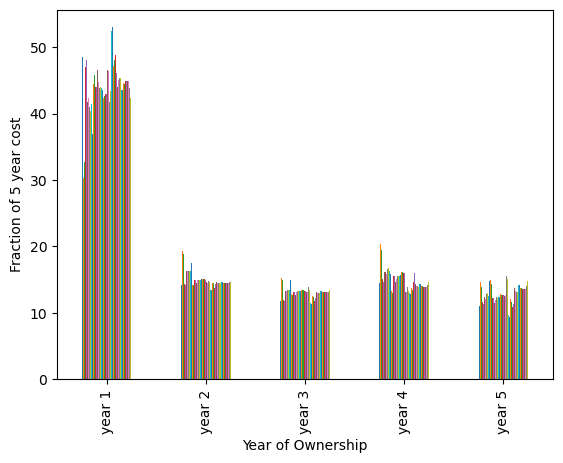

In [10]:
ev_yearly_fraction=pd.DataFrame(columns=['a'])
for i in range(5):
    text='year '+str(i+1)
    ev_yearly_fraction[text]=ev_yearly_cost_df[text]/ev_yearly_cost_df['five_year_cost']*100
del ev_yearly_fraction['a']
ev_yearly_fraction
ev_ratio_plot=ev_yearly_fraction.T.plot(kind='bar',legend=False,align="center")
ev_ratio_plot.set_xlabel("Year of Ownership")
ev_ratio_plot.set_ylabel("Fraction of 5 year cost")

In [11]:
ev_yearly_cost_df.sort_values("year 1",ascending=False)

,,,year 1,year 2,year 3,year 4,year 5,model year,five_year_cost
model,engine,cost,,,,,,,
Tesla Model X Plaid 4dr SUV AWD,electric DD,97523,57910,14705,12385,14086,10221,2023,109307
Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473,53584,15723,12941,15950,12236,2023,110434
Tesla Model X 4dr SUV AWD,electric DD,86852,51818,13349,11304,12885,9540,2023,98896
Audi e-tron Premium Plus 4dr SUV AWD,electric DD,82980,50458,14984,12358,15432,11866,2023,105098
Audi e-tron S Sportback Prestige 4dr SUV AWD,electric DD,96393,50183,19324,15824,18895,14411,2023,118637
Audi e-tron Premium 4dr SUV AWD,electric DD,76191,46165,14126,11684,14842,11452,2023,98269
Audi e-tron S Sportback Premium Plus 4dr SUV AWD,electric DD,97202,46123,17990,14769,17938,13713,2023,110533
Audi e-tron Sportback Prestige S line 4dr SUV AWD,electric DD,91398,43512,17095,14051,17144,13216,2023,105018
BMW iX M60 M60 4dr SUV AWD,electric DD,112924,43028,20509,17388,18462,17360,2023,116747


In [12]:
ev_yearly_cost_df['five_year_cost'].mean()

74179.0612244898

In [13]:
ev_yearly_cost_df['year 1'].head()

model                                      engine       cost 
Audi e-tron Chronos Edition 4dr SUV AWD    electric DD  88473    53584
Audi e-tron GT Premium Plus 4dr Sedan AWD  electric 2A  88666    26290
Audi e-tron GT Prestige 4dr Sedan AWD      electric 2A  98487    31068
Audi e-tron Premium 4dr SUV AWD            electric DD  76191    46165
Audi e-tron Premium Plus 4dr SUV AWD       electric DD  82980    50458
Name: year 1, dtype: int64

<Axes: >

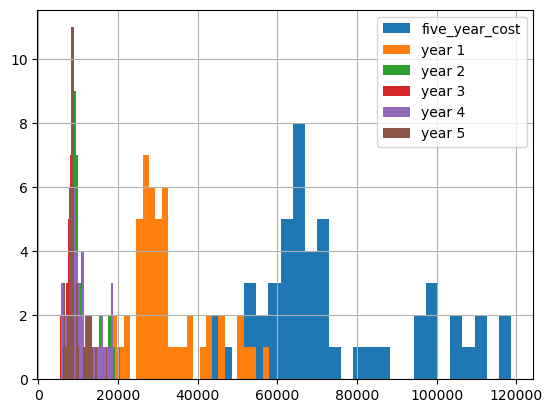

In [32]:
ev_yearly_cost_df['five_year_cost'].hist(bins = 25,legend=True)
ev_yearly_cost_df['year 1'].hist(bins = 25,legend=True)
ev_yearly_cost_df['year 2'].hist(bins = 25,legend=True)
ev_yearly_cost_df['year 3'].hist(bins = 25,legend=True)
ev_yearly_cost_df['year 4'].hist(bins = 25,legend=True)
ev_yearly_cost_df['year 5'].hist(bins = 25,legend=True)

In [68]:
print("The average total cost to own a new car for the first five years.")
display(f"1 year mean = ${round(ev_yearly_cost_df['year 1'].mean(),2)}")
display(f"2 year mean = ${round((ev_yearly_cost_df['year 1']+ev_yearly_cost_df['year 2']).mean(),2)}")
display((f"3 year mean = $"
         f"{round((ev_yearly_cost_df['year 1']+ev_yearly_cost_df['year 2']+ev_yearly_cost_df['year 3']).mean(),2)}"))
display(f"4 year mean = ${round((ev_yearly_cost_df['year 1']+ev_yearly_cost_df['year 2']+ev_yearly_cost_df['year 3'] +ev_yearly_cost_df['year 4']).mean(),2)}")
display(f"5 year mean = ${round(ev_yearly_cost_df['five_year_cost'].mean(),2)}")

The average total cost to own a new car for the first five years.


'1 year mean = $32659.65'

'2 year mean = $43875.73'

'3 year mean = $53566.43'

'4 year mean = $64745.88'

'5 year mean = $74179.06'

In [38]:
display(ev_df["cost"].max())
display(ev_df["cost"].min())
display(ev_df["cost"].mean())

112924

30119

61693.38775510204